In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,classification_report,precision_recall_curve,PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\ai project\Heart_Disease.csv")

In [3]:
data.describe()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
print(data)

      id   Age  Gender  Chest pain type   BP  Cholesterol  FBS over 120  \
0      1  70.0  Female                4  130          322             0   
1      2  67.0    Male                3  115          564             0   
2      3  57.0  Female                2  124          261             0   
3      4  64.0  Female                4  128          263             0   
4      5  74.0    Male                2  120          269             0   
..   ...   ...     ...              ...  ...          ...           ...   
265  266  52.0  Female                3  172          199             1   
266  267  44.0  Female                2  120          263             0   
267  268  56.0    Male                2  140          294             0   
268  269  57.0  Female                4  140          192             0   
269  270  67.0  Female                4  160          286             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0              2     109  

In [5]:


data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode(),inplace=True)
data['work_type'].fillna(data['work_type'].mode(),inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode(),inplace=True)
# data.dropna(axis=0,inplace=True)

In [6]:
 data.replace(to_replace="Unknown",value="never smoked",inplace=True)
  

In [7]:
print(data['smoking_status'].mode())

0    never smoked
Name: smoking_status, dtype: object


In [8]:
dummy_cols=['work_type','smoking_status','Gender' ]
non_dummy_cols=list(set(data.columns)-set(dummy_cols))

In [9]:
data=pd.get_dummies(data,columns=dummy_cols)
data['Heart Disease']=data['Heart Disease'].replace("Yes",1)
data['Heart Disease']=data['Heart Disease'].replace("No",0)
     
print(data)

      id   Age  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0      1  70.0                4  130          322             0            2   
1      2  67.0                3  115          564             0            2   
2      3  57.0                2  124          261             0            0   
3      4  64.0                4  128          263             0            0   
4      5  74.0                2  120          269             0            2   
..   ...   ...              ...  ...          ...           ...          ...   
265  266  52.0                3  172          199             1            0   
266  267  44.0                2  120          263             0            0   
267  268  56.0                2  140          294             0            2   
268  269  57.0                4  140          192             0            0   
269  270  67.0                4  160          286             0            2   

     Max HR  Exercise angina  ST depres

In [10]:
print(data.isnull().sum())

id                                0
Age                               0
Chest pain type                   0
BP                                0
Cholesterol                       0
FBS over 120                      0
EKG results                       0
Max HR                            0
Exercise angina                   0
ST depression                     0
Slope of ST                       0
Number of vessels fluro           0
Thallium                          0
Heart Disease                     0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Gender_Female                     0
Gender_Male                       0
dtype: int64


In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

In [12]:
data[(data["Cholesterol"]>370)]

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Gender_Female,Gender_Male
1,2,67.0,3,115,564,0,2,160,0,1.6,...,0,0,0,1,0,0,1,0,0,1
9,10,63.0,4,150,407,0,2,154,0,4.0,...,0,0,1,0,0,0,1,0,0,1
52,53,65.0,3,140,417,1,2,157,0,0.8,...,0,0,1,0,0,0,1,0,0,1
181,182,56.0,4,134,409,0,2,150,1,1.9,...,0,0,1,0,0,1,0,0,0,1
188,189,62.0,4,140,394,0,2,157,0,1.2,...,0,0,1,0,0,1,0,0,0,1


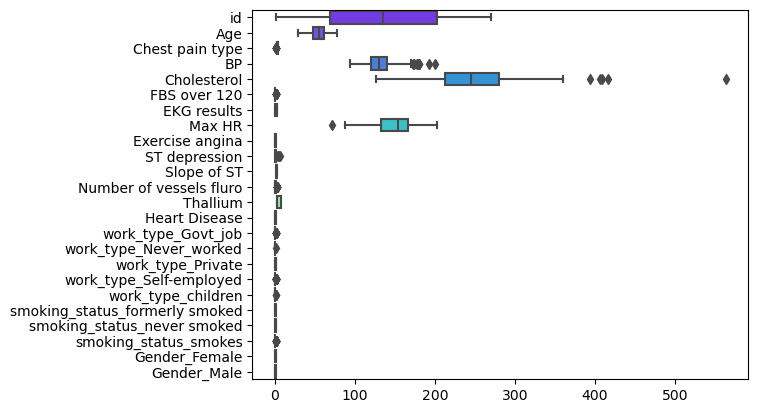

In [13]:
sns.boxplot(data=data,palette='rainbow',orient='h')
# cholestrol oultiers remove
data.drop([  1,   9,  181,52,188],axis=0,inplace=True)



In [14]:

print('skewness value of Cholestrol:',data['Cholesterol'].skew())
# 1.1628003276247532 before remove outlier
 
   

skewness value of Cholestrol: 0.10914766288712821


In [15]:
from scipy import stats
z=np.abs(stats.zscore(data['Cholesterol']))
print(z)
#  zscore 

0      1.717544
2      0.337138
3      0.382398
4      0.518175
5      1.563748
         ...   
265    1.065897
266    0.382398
267    1.083915
268    1.224304
269    0.902878
Name: Cholesterol, Length: 265, dtype: float64


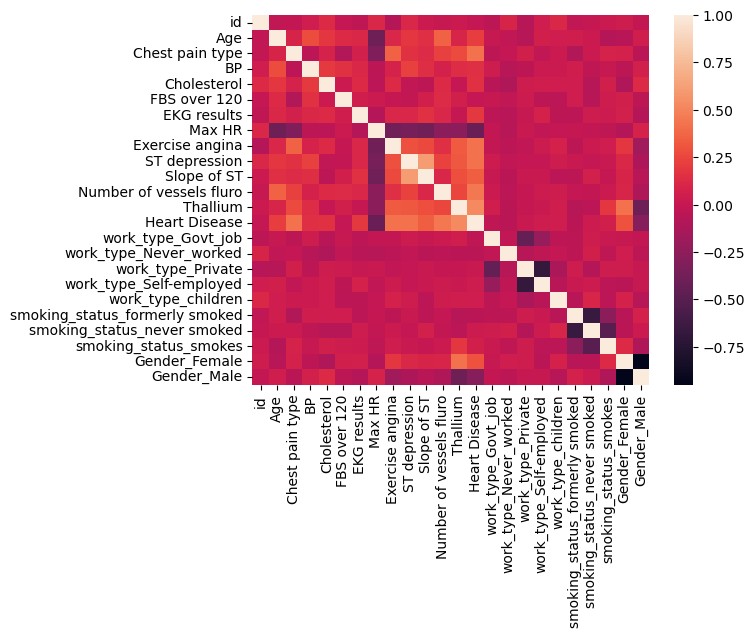

In [16]:
sns.heatmap(data.corr())
data.drop('work_type_Private',axis=1,inplace=True)
data.drop('id',axis=1,inplace=True)
data.drop('BP',axis=1,inplace=True)
# data.drop('Cholesterol',axis=1,inplace=True)
data.drop('FBS over 120',axis=1,inplace=True)
data.drop('work_type_Never_worked',axis=1,inplace=True)
data.drop('work_type_Self-employed',axis=1,inplace=True)
data.drop('work_type_children',axis=1,inplace=True)
# data.drop('smoking_status_Unknown',axis=1,inplace=True)
data.drop('smoking_status_smokes',axis=1,inplace=True)
data.drop('smoking_status_never smoked',axis=1,inplace=True)
data.drop('smoking_status_formerly smoked',axis=1,inplace=True)
# data.drop('Age',axis=1,inplace=True)
# data.drop('EKG results',axis=1,inplace=True)

In [17]:
data.corr()

,Age,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,work_type_Govt_job,Gender_Female,Gender_Male
Age,1.000000,0.093538,0.183605,0.113687,-0.402279,0.107554,0.185412,0.149873,0.358708,0.096859,0.214442,0.004294,-0.061405,0.052304
Chest pain type,0.093538,1.000000,0.079793,0.066908,-0.320539,0.356379,0.159090,0.131354,0.220082,0.261926,0.417527,-0.040261,0.078474,-0.054191
Cholesterol,0.183605,0.079793,1.000000,0.118884,-0.045403,0.120766,-0.024489,-0.038367,0.121091,-0.007039,0.158072,-0.063752,-0.108201,0.119021
EKG results,0.113687,0.066908,0.118884,1.000000,-0.080168,0.101889,0.108775,0.156346,0.106763,0.000621,0.187147,-0.047904,0.067349,-0.085003
Max HR,-0.402279,-0.320539,-0.045403,-0.080168,1.000000,-0.380622,-0.356952,-0.390487,-0.270468,-0.257207,-0.419929,-0.015947,-0.079946,0.079912
Exercise angina,0.107554,0.356379,0.120766,0.101889,-0.380622,1.000000,0.284646,0.258397,0.153361,0.322688,0.416190,-0.015404,0.180694,-0.166963
ST depression,0.185412,0.159090,-0.024489,0.108775,-0.356952,0.284646,1.000000,0.610674,0.236612,0.314982,0.415115,0.031695,0.111385,-0.118629
Slope of ST,0.149873,0.131354,-0.038367,0.156346,-0.390487,0.258397,0.610674,1.000000,0.106888,0.278199,0.338140,0.007593,0.091315,-0.059937
Number of vessels fluro,0.358708,0.220082,0.121091,0.106763,-0.270468,0.153361,0.236612,0.106888,1.000000,0.247333,0.447474,0.023148,0.101704,-0.104057
Thallium,0.096859,0.261926,-0.007039,0.000621,-0.257207,0.322688,0.314982,0.278199,0.247333,1.000000,0.523688,0.048759,0.419787,-0.402212


In [18]:
print(data.duplicated().sum())

0


In [19]:
x=data.drop('Heart Disease',axis=1)
y=data['Heart Disease']

In [20]:
# w=data[['Age','Cholesterol','Max HR']]
# print(w)
# d=pd.DataFrame(w)
# d.head()

In [21]:
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    x=scaler.transform(x)
    print (x)

[[-5.79603331 -2.40387242 -5.53032005 ... -1.5079319   0.03774275
  -2.09002838]
 [-5.95427305 -4.60583529 -5.56155807 ... -1.5079319   0.03774275
  -2.09002838]
 [-5.86906704 -2.40387242 -5.56053388 ... -1.5079319   0.03774275
  -2.09002838]
 ...
 [-5.96644534 -4.60583529 -5.54465881 ...  7.91065716 -4.52409953
   2.65490405]
 [-5.95427305 -2.40387242 -5.59689289 ... -1.5079319   0.03774275
  -2.09002838]
 [-5.83255017 -2.40387242 -5.5487556  ... -1.5079319   0.03774275
  -2.09002838]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
data.head()

,Age,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,work_type_Govt_job,Gender_Female,Gender_Male
0,70.0,4,322,2,109,0,2.4,2,3,3,1,0,1,0
2,57.0,2,261,0,141,0,0.3,1,0,7,1,0,1,0
3,64.0,4,263,0,105,1,0.2,2,1,7,0,0,1,0
4,74.0,2,269,2,121,1,0.2,1,1,3,0,0,0,1
5,65.0,4,177,0,140,0,0.4,1,0,7,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',C=1,random_state = 3)
# hyperparameter=random_state
classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=3)

In [25]:
predict=classifier.predict(X_test)
print(predict)

[0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1]


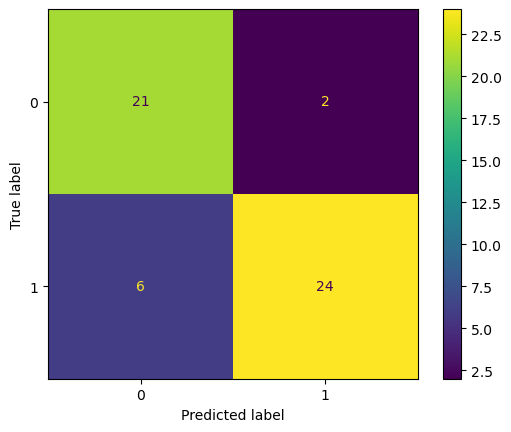

In [26]:
mean_squared_error(y_test, predict)
cm = confusion_matrix(y_test, predict, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

In [27]:
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.92      0.80      0.86        30

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.86      0.85      0.85        53



In [28]:
classifier.score(X_train,y_train)

0.8443396226415094

In [29]:
accuracy_score(y_test,predict)

0.8490566037735849

In [30]:
report=classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.92      0.80      0.86        30

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.86      0.85      0.85        53



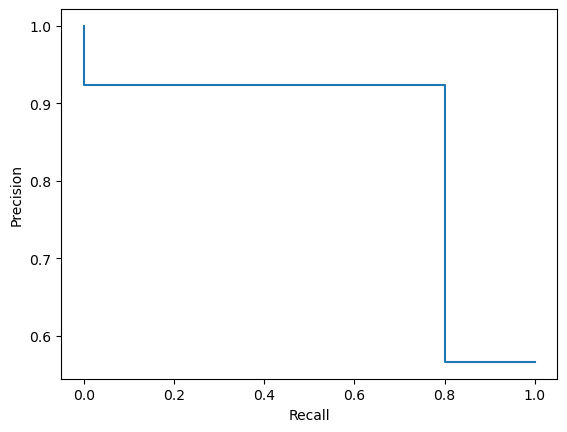

In [31]:
precision, recall, _ = precision_recall_curve(y_test, predict)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()

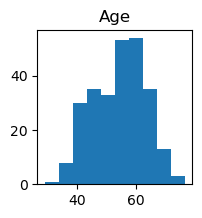

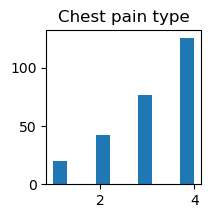

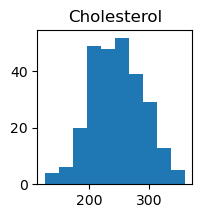

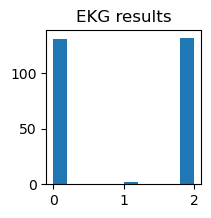

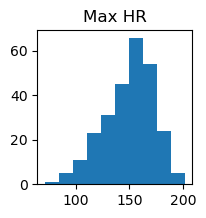

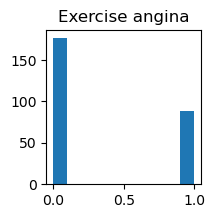

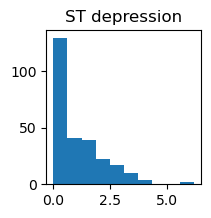

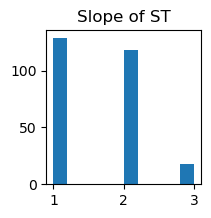

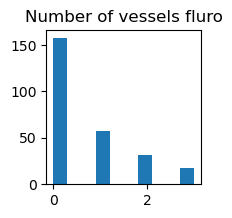

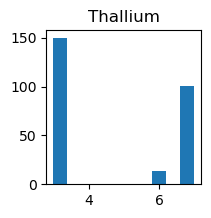

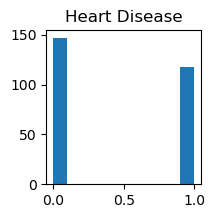

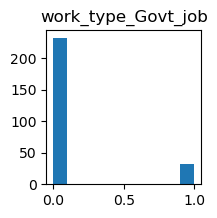

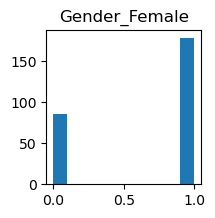

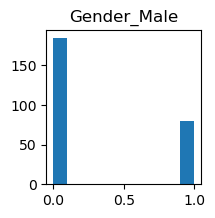

In [32]:
for col in data.columns:
 fig=plt.figure(figsize=(2,2))
 plt.title(col)
 plt.hist(data[col])

In [33]:
from sklearn.model_selection import train_test_split
Xt, Xte, yt, y_pred = train_test_split(x, y, test_size = 0.22, random_state = 3)

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', C=3,random_state = 4)
classifier.fit(Xt, yt)

SVC(C=3, kernel='poly', random_state=4)

In [35]:
pred=classifier.predict(Xte)
print("prediction", pred)

prediction [0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0]


0.13559322033898305

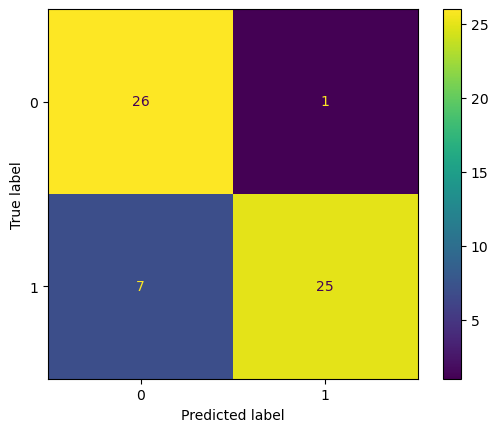

In [36]:
cm = confusion_matrix(y_pred, pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
mean_squared_error(y_pred, pred)


In [37]:
report=classification_report(y_pred,pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.96      0.78      0.86        32

    accuracy                           0.86        59
   macro avg       0.87      0.87      0.86        59
weighted avg       0.88      0.86      0.86        59



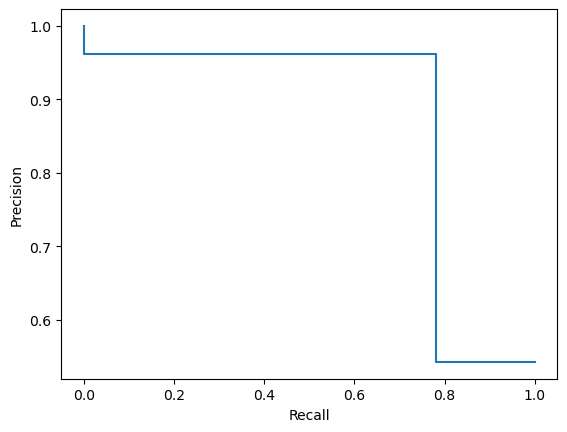

In [38]:
precision, recall, _ = precision_recall_curve(y_pred, pred)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()

In [39]:
accuracy_score(y_pred,pred)

0.864406779661017

In [40]:
classifier.score(Xt,yt)

0.8786407766990292

In [41]:
report=classification_report(y_pred,pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.96      0.78      0.86        32

    accuracy                           0.86        59
   macro avg       0.87      0.87      0.86        59
weighted avg       0.88      0.86      0.86        59



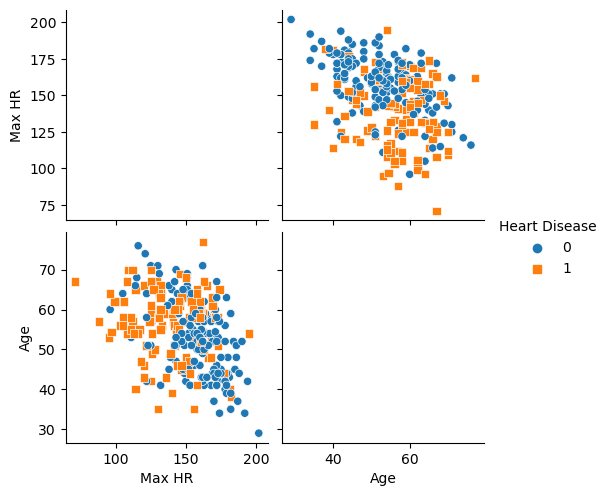

In [42]:
sns.pairplot(data,vars=['Max HR', 'Age' ],diag_kind='scatter',hue='Heart Disease',markers=["o","s"])
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
Xdst_train, Xdst_test, ydst_train, ydst_test = train_test_split(x, y, test_size = 0.2, random_state=6)

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifir = DecisionTreeClassifier(criterion = 'entropy',random_state = 4,max_depth=4,max_features=3)
classifir.fit(Xdst_train, ydst_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3,
                       random_state=4)

In [45]:
ydst_pred = classifir.predict(Xdst_test)
print(ydst_pred)

[0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0]


0.16981132075471697

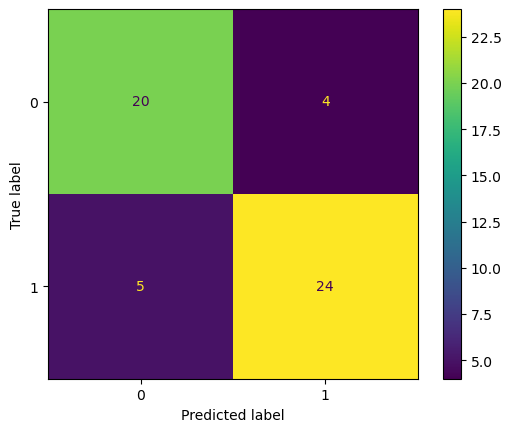

In [46]:
cm = confusion_matrix(ydst_test, ydst_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

mean_squared_error(ydst_test, ydst_pred)

In [47]:
accuracy_score(ydst_test,ydst_pred)

0.8301886792452831

In [48]:
report=classification_report(ydst_test,ydst_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.86      0.83      0.84        29

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53



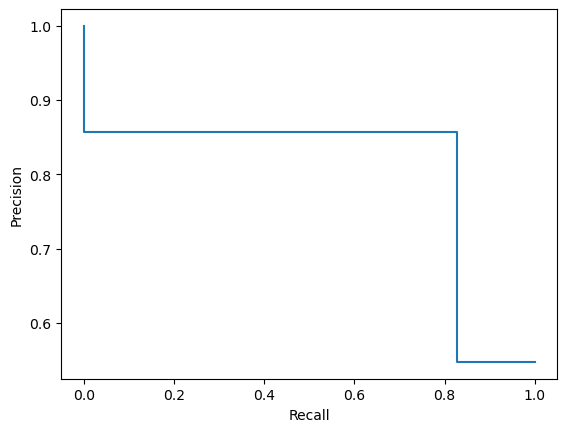

In [49]:
precision, recall, _ = precision_recall_curve(ydst_test, ydst_pred)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()

In [50]:
classifir.score(Xdst_train,ydst_train)

0.8490566037735849

In [51]:
from sklearn.model_selection import train_test_split
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(x, y, test_size = 0.2, random_state =3)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =4 , metric = 'minkowski', p = 1)
# Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1),
classifier.fit(Xknn_train, yknn_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [53]:
yknn_pred = classifier.predict(Xknn_test)
print(yknn_pred)

[0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8490566037735849

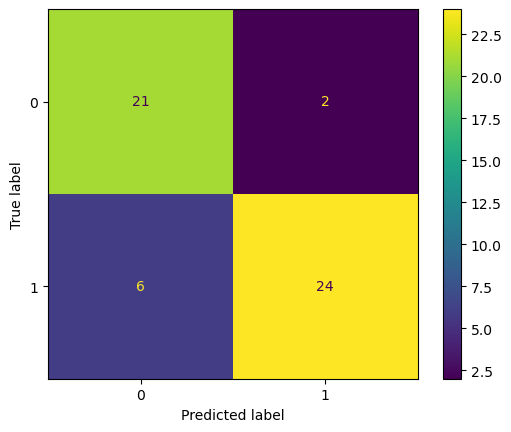

In [54]:
cm = confusion_matrix(yknn_test, yknn_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
accuracy_score(yknn_test, yknn_pred)

In [55]:
mean_squared_error(yknn_test, yknn_pred)

0.1509433962264151

In [56]:
classifir.score(Xknn_train,yknn_train)
# train acurracy

0.8490566037735849

In [57]:
report=classification_report(yknn_test,yknn_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.92      0.80      0.86        30

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.86      0.85      0.85        53



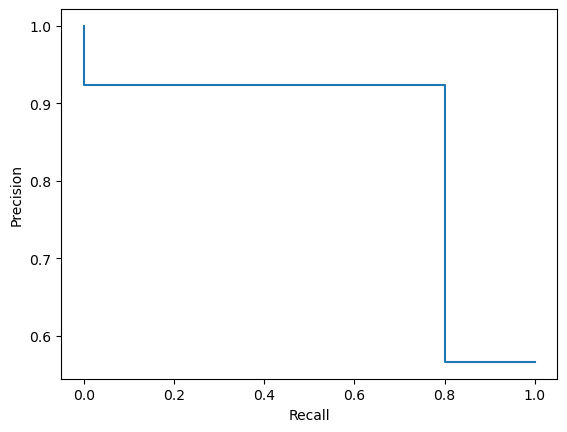

In [58]:
precision, recall, _ = precision_recall_curve(yknn_test, yknn_pred)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()

In [59]:
from sklearn.model_selection import train_test_split
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(x, y, test_size = 0.2, random_state =6 )

In [60]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state =4 ,max_depth=4,max_features='sqrt')             
classifier.fit(Xrf_train, yrf_train)


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       random_state=4)

In [61]:
yrf_pred = classifier.predict(Xrf_test)
print(yrf_pred)

[0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1]


0.8867924528301887

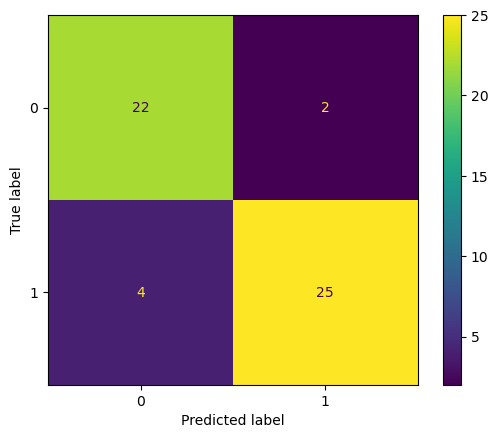

In [62]:
cm = confusion_matrix(yrf_test, yrf_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
accuracy_score(yrf_test, yrf_pred)

In [63]:
mean_squared_error(yrf_test, yrf_pred)

0.11320754716981132

In [64]:
classifir.score(Xrf_train,yrf_train)

0.8490566037735849

In [65]:
report=classification_report(yrf_test,yrf_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.93      0.86      0.89        29

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



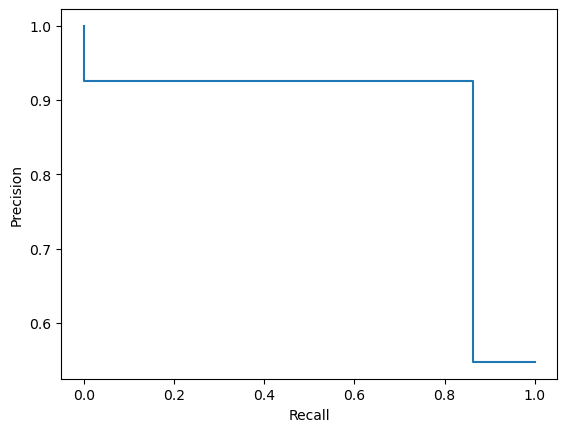

In [66]:
precision, recall, _ = precision_recall_curve(yrf_test, yrf_pred)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()

In [67]:
print(data)

      Age  Chest pain type  Cholesterol  EKG results  Max HR  Exercise angina  \
0    70.0                4          322            2     109                0   
2    57.0                2          261            0     141                0   
3    64.0                4          263            0     105                1   
4    74.0                2          269            2     121                1   
5    65.0                4          177            0     140                0   
..    ...              ...          ...          ...     ...              ...   
265  52.0                3          199            0     162                0   
266  44.0                2          263            0     173                0   
267  56.0                2          294            2     153                0   
268  57.0                4          192            0     148                0   
269  67.0                4          286            2     108                1   

     ST depression  Slope o

In [68]:
data.head()

,Age,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,work_type_Govt_job,Gender_Female,Gender_Male
0,70.0,4,322,2,109,0,2.4,2,3,3,1,0,1,0
2,57.0,2,261,0,141,0,0.3,1,0,7,1,0,1,0
3,64.0,4,263,0,105,1,0.2,2,1,7,0,0,1,0
4,74.0,2,269,2,121,1,0.2,1,1,3,0,0,0,1
5,65.0,4,177,0,140,0,0.4,1,0,7,0,0,1,0


In [69]:
! pip3 install xgboost

In [70]:
from sklearn.model_selection import train_test_split
Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(x, y, test_size = 0.3, random_state =4 )

In [71]:
import xgboost as xgb
classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='auto', eta=0.03, max_depth=3)
classifier.fit(Xgb_train, ygb_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.03, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [72]:
ygb_pred = classifier.predict(Xgb_test)
print(ygb_pred)

[0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 1]


testing accuracy = 0.8625
training accuracy = 0.8486486486486486


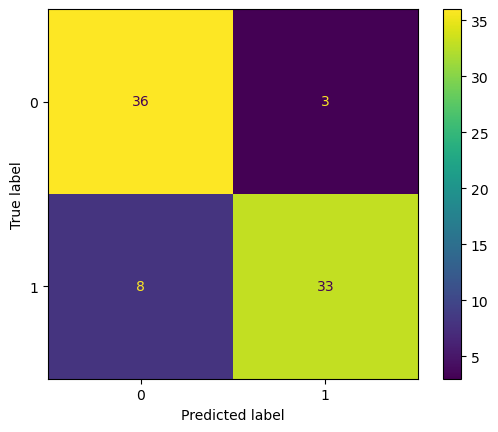

In [73]:
cm = confusion_matrix(ygb_test, ygb_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
print("testing accuracy =",accuracy_score(ygb_test, ygb_pred))
print("training accuracy =",classifir.score(Xgb_train,ygb_train))

In [74]:
report=classification_report(ygb_test,ygb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        39
           1       0.92      0.80      0.86        41

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



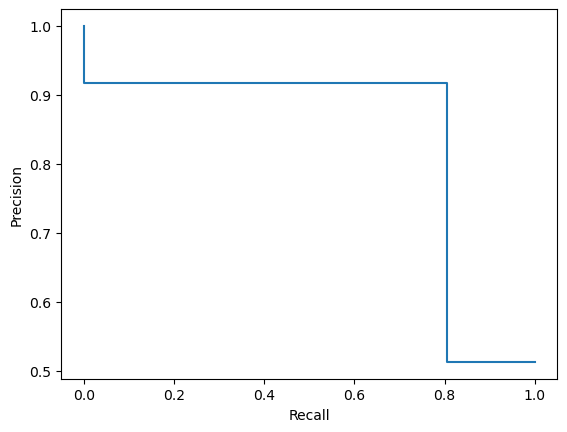

In [75]:
precision, recall, _ = precision_recall_curve(ygb_test, ygb_pred)
>>> disp = PrecisionRecallDisplay(precision=precision, recall=recall)
>>> disp.plot()